In [1]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Laden des Datensatzes
data = pd.read_csv('fake_job_postings.csv')

In [3]:
# fülle alle leeren Werte mit einem Leerstring
data = data.fillna('')

In [4]:
# Vektorisierung des Texts
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(data['description'])

CountVectorizer(stop_words='english')

In [5]:
X = vectorizer.transform(data['description'])
y = data['fraudulent']

In [6]:
# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.toarray().shape

(14304, 61934)

In [8]:
# Erstellung des Modells
model = Sequential()

# Erste Schicht
model.add(Dense(512, input_shape=(len(vectorizer.get_feature_names()),), activation='relu'))

# Dropout-Schicht
model.add(Dropout(0.5))

# Zweite Schicht
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Ausgabeschicht
model.add(Dense(1, activation='sigmoid'))

c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Training des Modells
model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_data=(X_test.toarray(), y_test))

Epoch 1/10
447/447 [==============================] - 122s 264ms/step - loss: 0.1569 - accuracy: 0.9627 - val_loss: 0.1278 - val_accuracy: 0.9743
Epoch 2/10
447/447 [==============================] - 132s 296ms/step - loss: 0.0565 - accuracy: 0.9843 - val_loss: 0.1238 - val_accuracy: 0.9779
Epoch 3/10
447/447 [==============================] - 156s 350ms/step - loss: 0.0207 - accuracy: 0.9952 - val_loss: 0.1740 - val_accuracy: 0.9813
Epoch 4/10
447/447 [==============================] - 161s 360ms/step - loss: 0.0190 - accuracy: 0.9962 - val_loss: 0.1876 - val_accuracy: 0.9782
Epoch 5/10
447/447 [==============================] - 161s 359ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.2793 - val_accuracy: 0.9787
Epoch 6/10
447/447 [==============================] - 160s 357ms/step - loss: 0.0077 - accuracy: 0.9987 - val_loss: 0.2529 - val_accuracy: 0.9787
Epoch 7/10
447/447 [==============================] - 162s 362ms/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.2494 -

In [11]:
# Bewertung des Modells
score, acc = model.evaluate(X_test.toarray(), y_test, batch_size=32)

112/112 [==============================] - 7s 65ms/step - loss: 0.3209 - accuracy: 0.9793


In [12]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.3208819031715393
Test accuracy: 0.9793064594268799


112/112 [==============================] - 5s 39ms/step


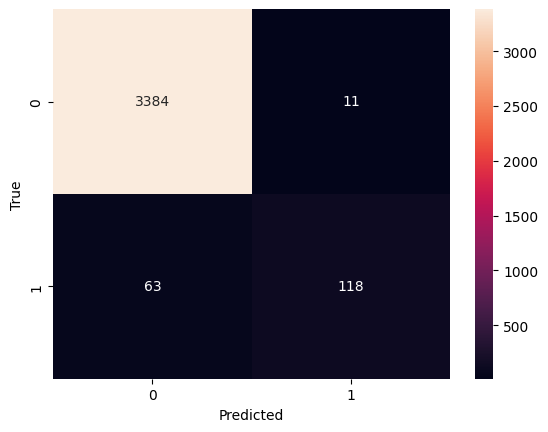

In [13]:
# Klassifikationsmatrix plotten

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test.toarray())
y_pred = np.round(y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
#achsen
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


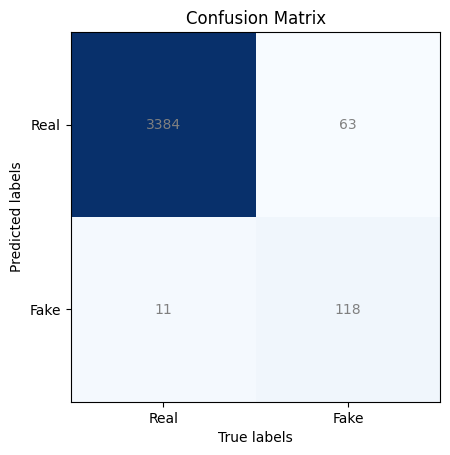

In [14]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("True labels")
plt.ylabel("Predicted labels")
plt.xticks([0, 1], ['Real', 'Fake'])
plt.yticks([0, 1], ['Real', 'Fake'])
plt.text(0, 0, cm[0,0], ha="center", va="center", color="grey")
plt.text(0, 1, cm[0,1], ha="center", va="center", color="grey")
plt.text(1, 0, cm[1,0], ha="center", va="center", color="grey")
plt.text(1, 1, cm[1,1], ha="center", va="center", color="grey")
plt.show()

In [15]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

112/112 [==============================] - 1s 4ms/step


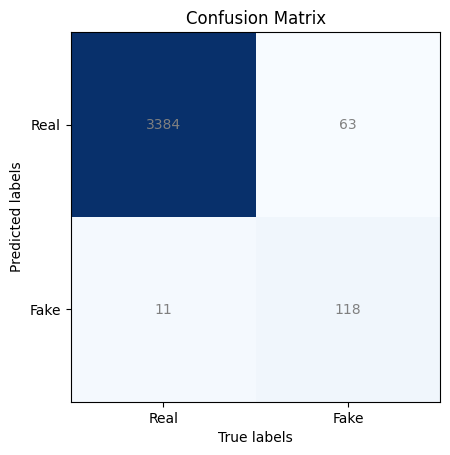

In [16]:
# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("True labels")
plt.ylabel("Predicted labels")
plt.xticks([0, 1], ['Real', 'Fake'])
plt.yticks([0, 1], ['Real', 'Fake'])
plt.text(0, 0, cm[0,0], ha="center", va="center", color="grey")
plt.text(0, 1, cm[0,1], ha="center", va="center", color="grey")
plt.text(1, 0, cm[1,0], ha="center", va="center", color="grey")
plt.text(1, 1, cm[1,1], ha="center", va="center", color="grey")
plt.show()